In [9]:
!ls ../datas/csv

EcommerceCustomers.csv  EcommerceCustomers.xlsx USA_Housing.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [11]:
df= pd.read_excel('../datas/csv/EcommerceCustomers.xlsx')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [14]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

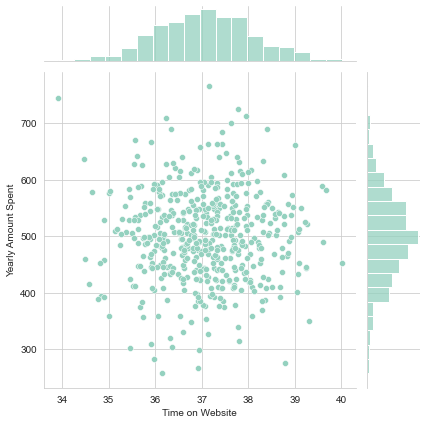

In [15]:
sns.jointplot(x='Time on Website', y = 'Yearly Amount Spent', data=df)

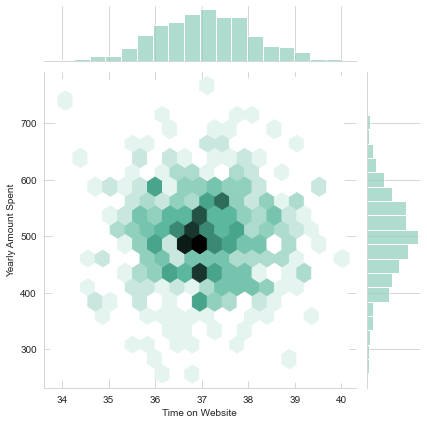

In [16]:
sns.jointplot(x='Time on Website', y = 'Yearly Amount Spent', data=df, kind='hex')

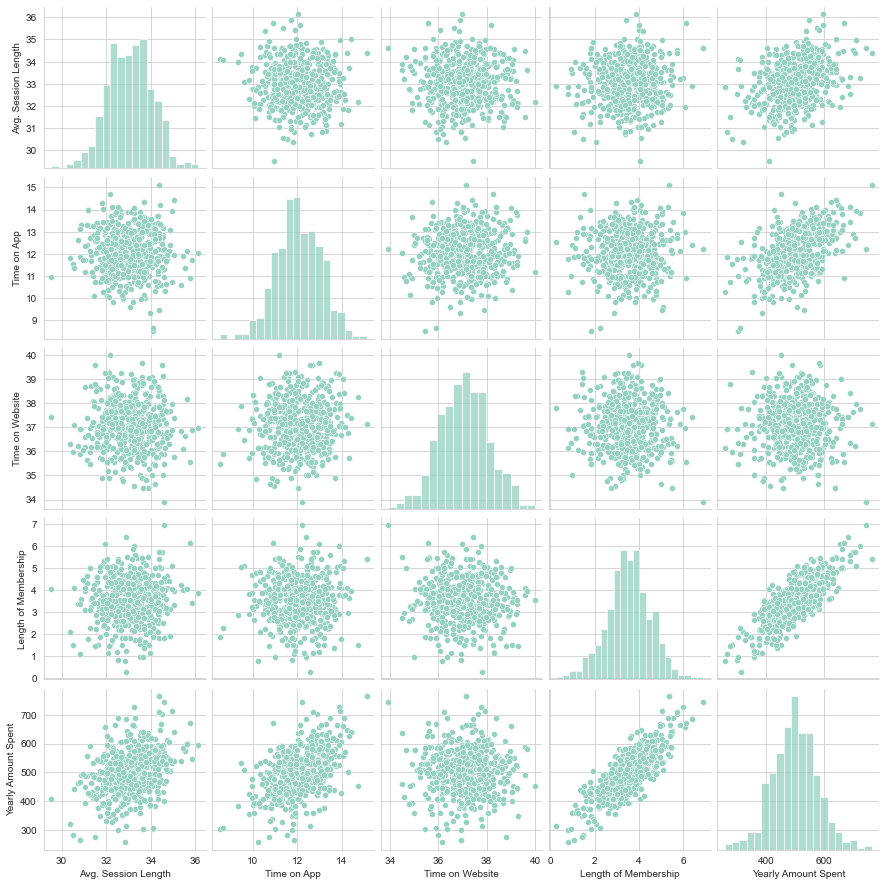

In [17]:
sns.pairplot(df)

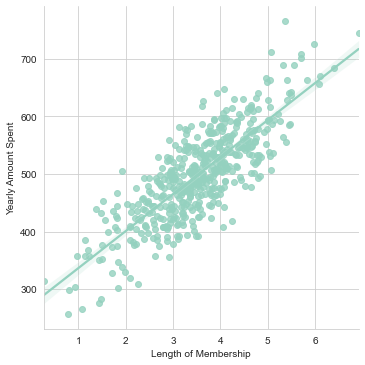

In [18]:
sns.lmplot(x = 'Length of Membership', y= 'Yearly Amount Spent', data=df)

In [19]:
y = df['Yearly Amount Spent']
x = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
predictions = lr.predict(x_test)
predictions

array([423.41056794, 547.60745145, 463.29236365, 542.78586944,
       541.97268861, 587.24482468, 474.43303421, 380.34383595,
       532.07064542, 550.16986818, 467.21456779, 541.96350751,
       511.52181442, 645.06589368, 619.17203348, 400.13795774,
       603.75737301, 484.37652635, 495.23293226, 445.14496879,
       534.03263996, 533.04364164, 456.17978632, 566.75196454,
       505.65782463, 626.73920175, 515.73001146, 455.64013522,
       522.94257091, 478.08842535, 471.34917696, 494.50661613,
       539.28560822, 558.40295917, 406.24202655, 470.88534356,
       577.06211373, 512.59046441, 527.06379096, 424.08046055,
       558.53127366, 580.05817063, 380.01780795, 650.21320009,
       408.64417849, 496.0040818 , 675.82702673, 305.02524882,
       497.83443998, 561.97592724, 513.48556674, 482.52259341,
       542.14301357, 505.07583086, 525.97644959, 472.78465406,
       484.52131963, 254.24972027, 494.16910015, 481.66452158,
       409.41309351, 534.44244736, 462.87002074, 494.50

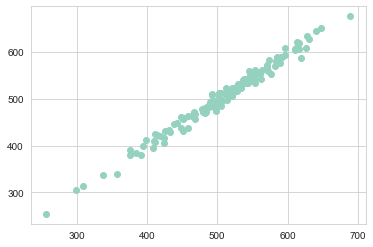

In [24]:
plt.scatter(y_test, predictions)

In [25]:
from sklearn import metrics

In [26]:
print(metrics.mean_squared_error(y_test, predictions))
print(metrics.mean_absolute_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

100.58684459873459
7.9493058939706245
10.02929930746583


In [27]:
# 결정계수 
lr.score(x_test, y_test)

0.9824774195922101

In [28]:
# 결정계수 (r**2)
metrics.r2_score(y_test, predictions)

0.9824774195922101

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

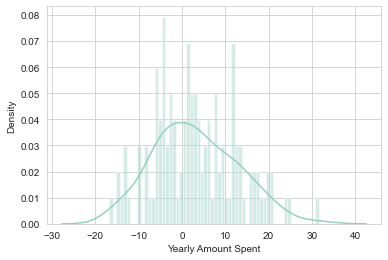

In [29]:
sns.distplot(y_test - predictions, bins=60)

In [30]:
lr.coef_

array([25.41623148, 38.56893569,  0.41445015, 61.64353244])

In [31]:
lr.intercept_

-1039.5743916336821

In [32]:
pd.DataFrame({'Coef_':lr.coef_}, index=x.columns)

,Coef_
Avg. Session Length,25.416231
Time on App,38.568936
Time on Website,0.414450
Length of Membership,61.643532
